In [1]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/iris_data.csv"
df = pd.read_csv(path)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.shape

(150, 5)

In [4]:
df.columns.tolist()

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [5]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [6]:
df["species"].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [7]:
stats_df = df.describe()
stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']

out_fields = [
    'mean',
    "25%",
    "50%",
    "75%",
    "range",
]
stats_df = stats_df.loc[out_fields]
stats_df.rename({"50%":"median"}, inplace=True)
stats_df

,sepal_length,sepal_width,petal_length,petal_width
mean,5.843333,3.054,3.758667,1.198667
25%,5.100000,2.800,1.600000,0.300000
median,5.800000,3.000,4.350000,1.300000
75%,6.400000,3.300,5.100000,1.800000
range,3.600000,2.400,5.900000,2.400000


In [8]:
df.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [9]:
df.groupby('species').agg(["mean", "median"])

sepal_length        sepal_width        petal_length         \
                   mean median        mean median         mean median   
species                                                                 
setosa            5.006    5.0       3.418    3.4        1.464   1.50   
versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
virginica         6.588    6.5       2.974    3.0        5.552   5.55   

           petal_width         
                  mean median  
species                        
setosa           0.244    0.2  
versicolor       1.326    1.3  
virginica        2.026    2.0

[]

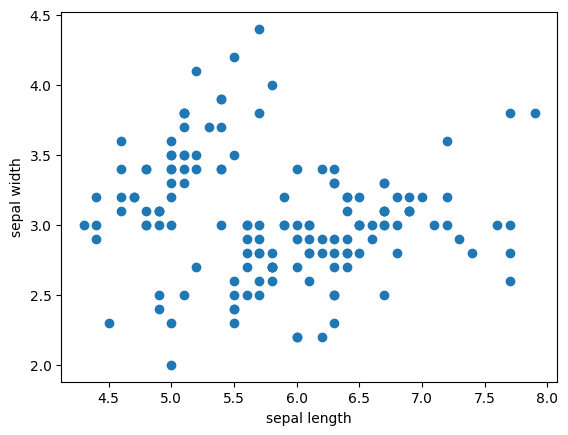

In [10]:
ax1 = plt.axes()
ax1.scatter(df.sepal_length, df.sepal_width)
ax1.set(xlabel="sepal length", ylabel="sepal width")
ax1.plot()

[]

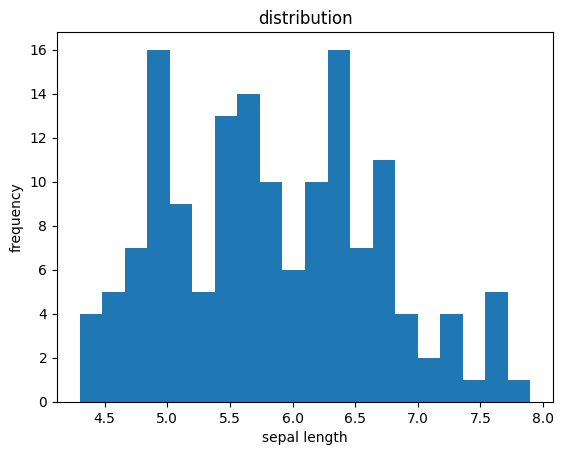

In [11]:
ax2 = plt.axes()
ax2.hist(df.sepal_length, bins=20)
ax2.set(xlabel="sepal length", ylabel="frequency", title="distribution")
ax2.plot()

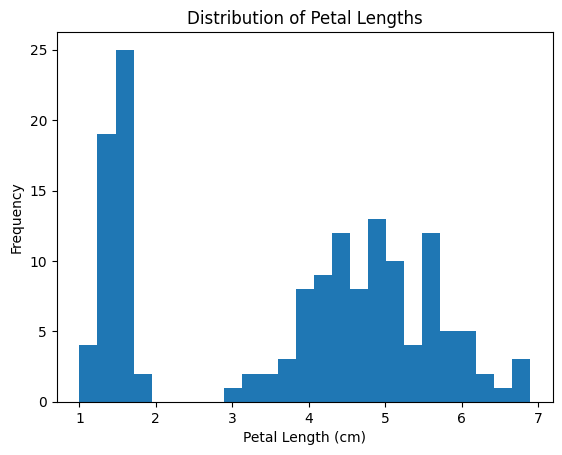

In [12]:
ax3 = df.petal_length.plot.hist(bins=25)
ax3.set(xlabel='Petal Length (cm)', ylabel='Frequency', title='Distribution of Petal Lengths');

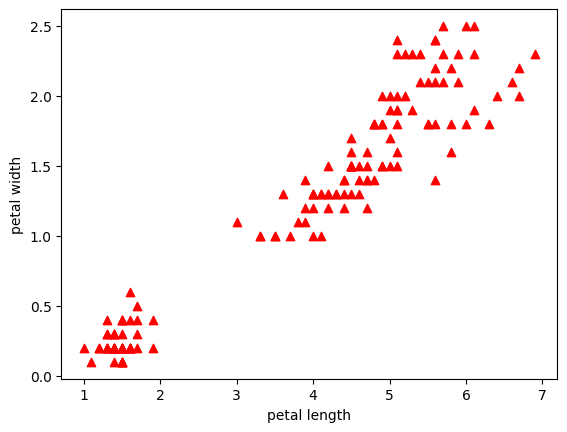

In [13]:
plt.scatter(df.petal_length, df.petal_width, marker="^", color="r")
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.show()

array([[<Axes: title={'center': 'petal_length'}, xlabel='[species]'>,
        <Axes: title={'center': 'petal_width'}, xlabel='[species]'>],
       [<Axes: title={'center': 'sepal_length'}, xlabel='[species]'>,
        <Axes: title={'center': 'sepal_width'}, xlabel='[species]'>]],
      dtype=object)

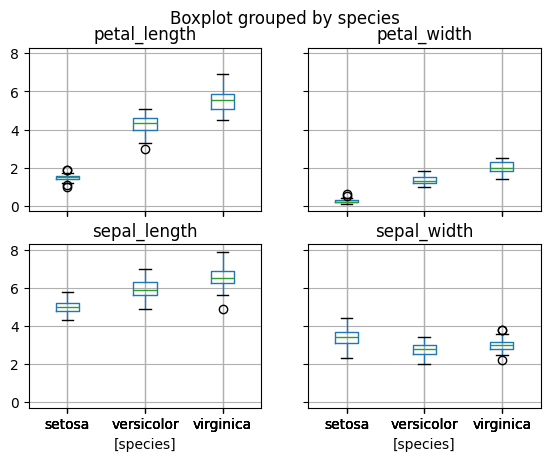

In [14]:
df.boxplot(by="species")

In [27]:
df.set_index("species").stack().to_frame().reset_index().rename(columns={
    0:"size", 
    "level_1":"measurements"
})

,species,measurements,size
0,setosa,sepal_length,5.1
1,setosa,sepal_width,3.5
2,setosa,petal_length,1.4
3,setosa,petal_width,0.2
4,setosa,sepal_length,4.9
...,...,...,...
595,virginica,petal_width,2.3
596,virginica,sepal_length,5.9
597,virginica,sepal_width,3.0
598,virginica,petal_length,5.1


In [17]:
plot_data = (df
            .set_index('species')
            .stack()
            .to_frame()
            .reset_index()
            .rename(columns={0:'size', 'level_1':'measurement'})
)
plot_data.head()

,species,measurement,size
0,setosa,sepal_length,5.1
1,setosa,sepal_width,3.5
2,setosa,petal_length,1.4
3,setosa,petal_width,0.2
4,setosa,sepal_length,4.9


<Axes: xlabel='measurement', ylabel='size'>

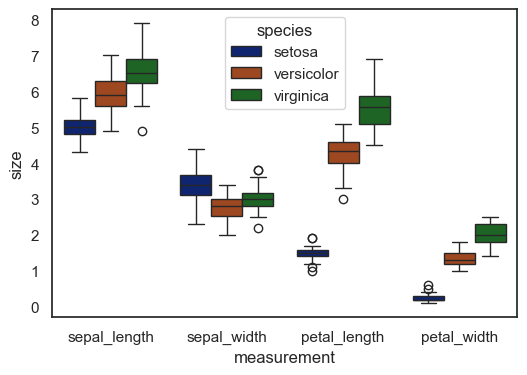

In [35]:
plt.figure(figsize=(6,4))
sns.boxplot(x='measurement', y='size', hue='species', data=plot_data)

Text(0.5, 0, 'Size (cm)')

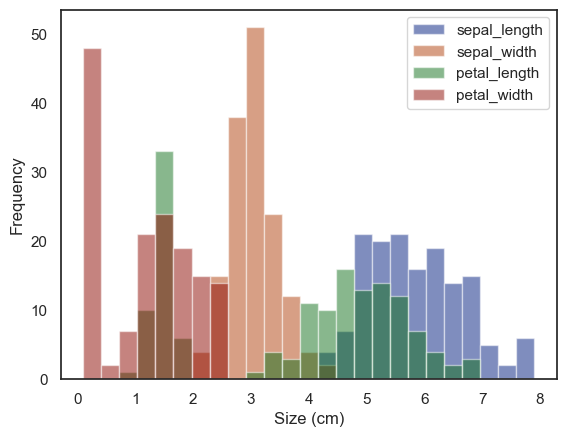

In [21]:
ax = df.plot.hist(bins=25, alpha=0.5)
ax.set_xlabel('Size (cm)')


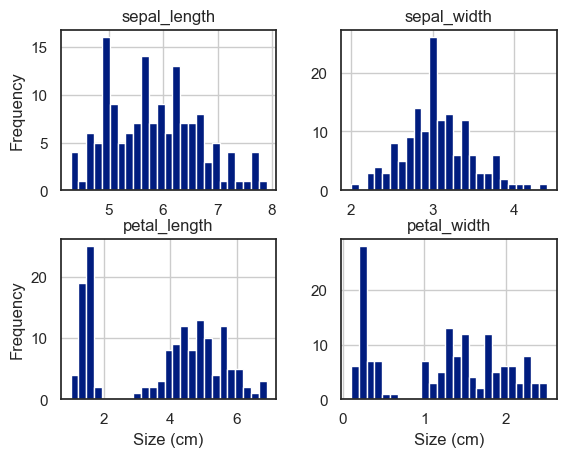

In [22]:

axList = df.hist(bins=25)
axList = np.array(axList)
n_rows, n_cols = axList.shape

for r in range(n_rows):
    for c in range(n_cols):
        ax = axList[r, c]
        if r == n_rows - 1:
            ax.set_xlabel('Size (cm)')
        if c == 0:
            ax.set_ylabel('Frequency')

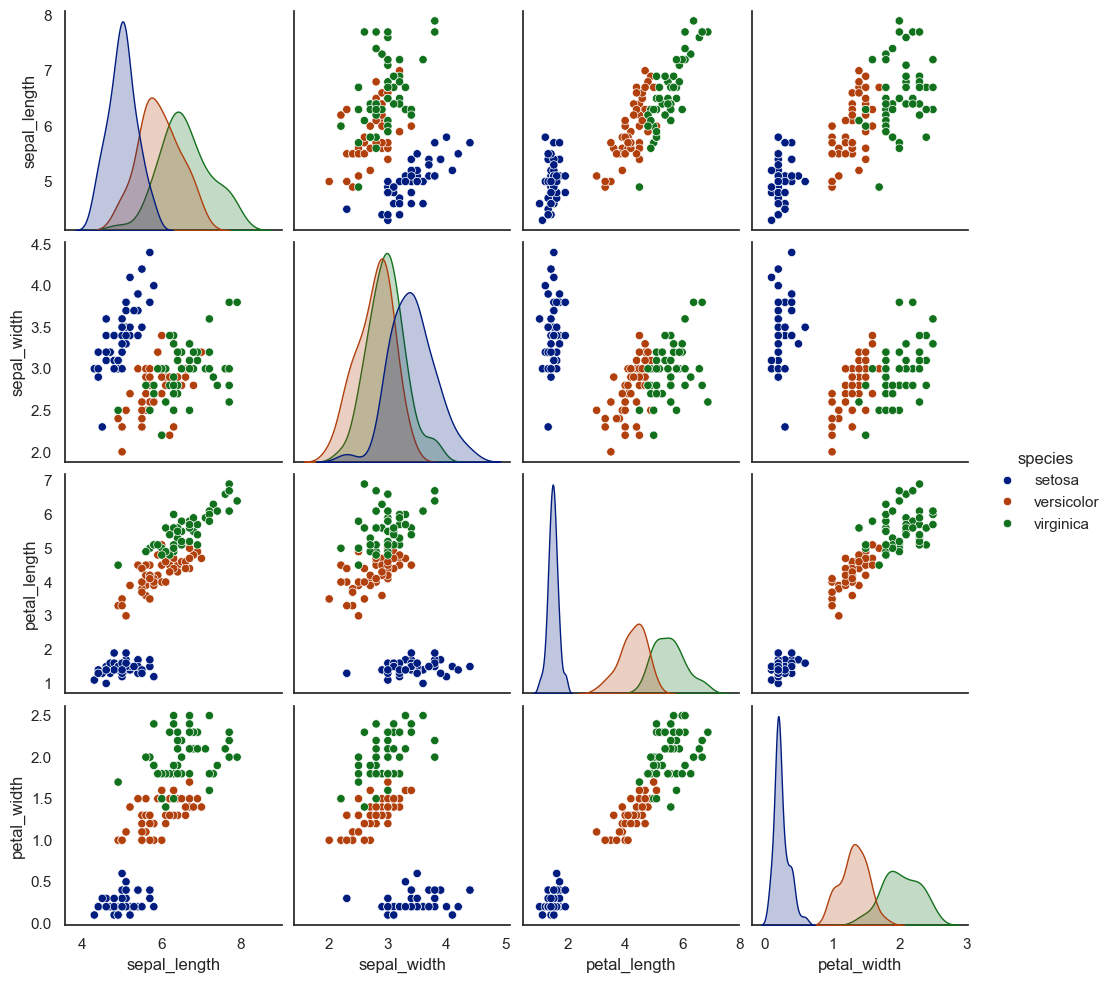

In [41]:
ax4 = sns.pairplot(df, hue="species")

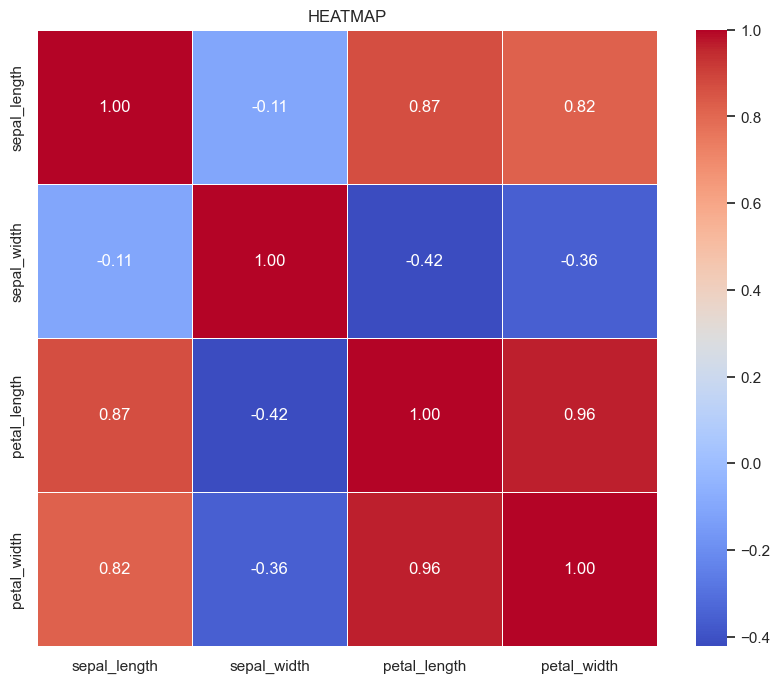

In [46]:
correlation = df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("HEATMAP")
plt.show()

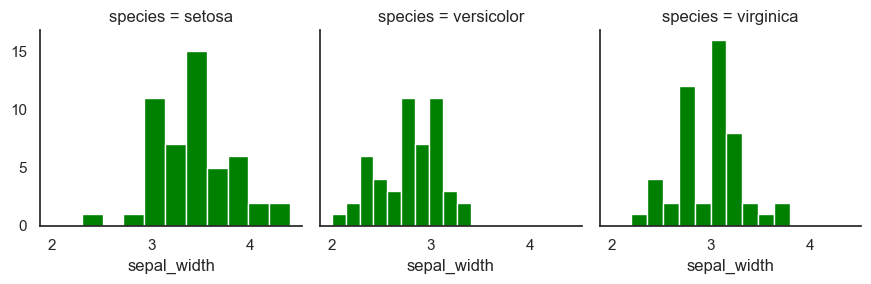

In [48]:
ax5 = sns.FacetGrid(df, col="species")
ax5.map(plt.hist, 'sepal_width', color='green')

<Figure size 1000x800 with 0 Axes>

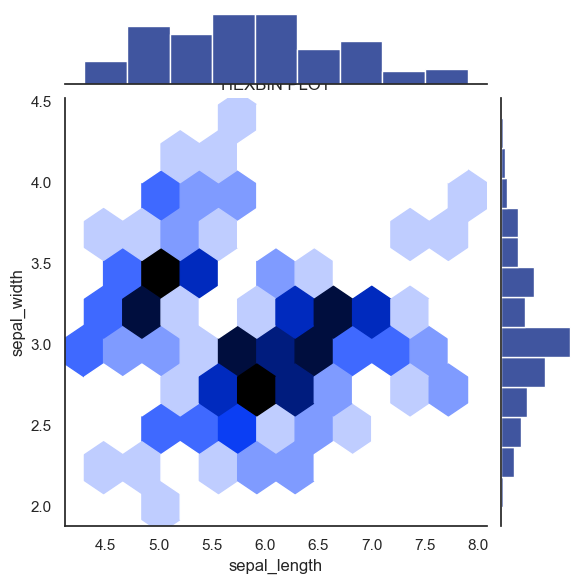

In [51]:
plt.figure(figsize=(10,8))
sns.jointplot(x=df.sepal_length, y=df.sepal_width, kind='hex')
plt.title("HEXBIN PLOT")
plt.show()